In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_121308/378825449.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


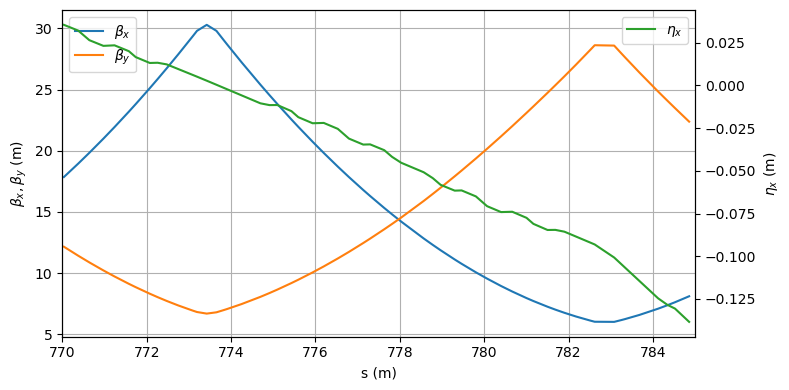

In [9]:


# ファイルを読み込む
filename = "sler_1801_80_1.disp"  # ファイル名を指定
columns = ["AX", "BX", "NX", "EX", "EPX", "Element", "Length", "Value", "s", 
           "AY", "BY", "NY", "EY", "EPY", "DetR", "ID"]

# ヘッダー行をスキップして読み込み
data = pd.read_csv(
    filename, 
    delim_whitespace=True, 
    names=columns, 
    comment="A"  # 'A'で始まる行を無視
)

# s の範囲を指定
s_min = 770
s_max = 785

# 指定範囲内のデータを抽出
filtered_data = data[(data["s"] >= s_min) & (data["s"] <= s_max)]

# プロット
fig, ax1 = plt.subplots(figsize=(8, 4))

# 左軸に BX と BY をプロット
ax1.plot(filtered_data["s"], filtered_data["BX"], label=r"$\beta_x$", color="tab:blue")
ax1.plot(filtered_data["s"], filtered_data["BY"], label=r"$\beta_y$", color="tab:orange")
ax1.set_xlabel("s (m)")
ax1.set_ylabel(r'$\beta_x, \beta_y$ (m)')
ax1.tick_params(axis="y")
ax1.legend(loc="upper left")
ax1.grid()

# 横軸ラベルにエレメント名と s を表示
#ax1.set_xticks(filtered_data["s"])
#ax1.set_xticklabels(
#    filtered_data["Element"] + "\n" + filtered_data["s"].round(2).astype(str),
#    rotation=45
#)

# 右軸に EX をプロット
ax2 = ax1.twinx()
ax2.plot(filtered_data["s"], filtered_data["EX"], label=r"$\eta_x$", color="tab:green")
ax2.set_ylabel(r"$\eta_x$ (m)")
ax2.tick_params(axis="y")
ax2.legend(loc="upper right")
plt.xlim(s_min,s_max)
plt.tight_layout()
plt.show()



In [2]:
D10_L02_after=np.array([1.44e-6,4.53e-6,7.87e-7,7.12e-6,1.13e-6,
                        2.58e-6,7.74e-7,1.23e-6,#1.14e-6,
                        1.36e-6,
                        3.43e-7,1.23e-6,7.07e-7,#1.39e-6,
                        1.1e-6,1.81e-6,1.6e-6,9.16e-6,1.64e-6,
                       3.64e-6,2.62e-7,1.06e-6])

D10_L03_after=np.array([1.4e-6,4.46e-6,8.99e-7,7.02e-6,1.2e-6,
                       3.09e-6,8.22e-7,1.35e-6,
                       1.35e-6,
                       4.01e-7,1.28e-6,1.02e-6,
                       1.04e-6,1.95e-6,1.91e-6,9.35e-6,1.67e-6,
                       3.93e-6,2.71e-7,1.22e-6])

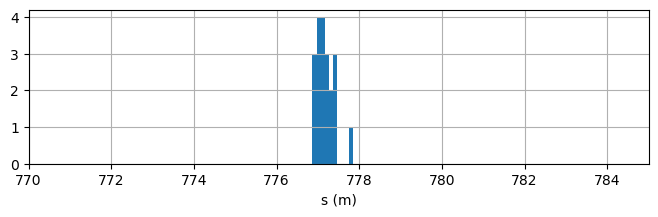

In [12]:
plt.figure(figsize=(8,2))
plt.hist((D10_L02_after*772.3+D10_L03_after*781.7)/(D10_L02_after+D10_L03_after))
plt.grid()
plt.xlim(770,785)
plt.xlabel('s (m)')
plt.show()

In [13]:
(D10_L02_after*772.3+D10_L03_after*781.7)/(D10_L02_after+D10_L03_after)

array([776.93380282, 776.96340378, 777.31221827, 776.96676096,
       777.14120172, 777.42275132, 777.14135338, 777.21860465,
       776.98265683, 777.36639785, 777.0936255 , 777.85182397,
       776.8682243 , 777.175     , 777.41509972, 777.04824419,
       777.04259819, 777.18005284, 777.0793621 , 777.32982456])